In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

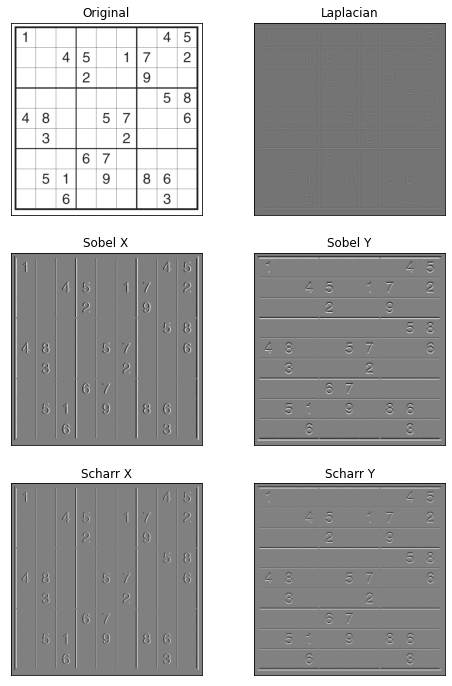

In [13]:
img = cv2.imread("../data/sudoku.jpeg", cv2.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

plt.figure(figsize=(8, 12))

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
scharrx = cv2.Scharr(img, cv2.CV_64F, 1, 0)
scharry = cv2.Scharr(img, cv2.CV_64F, 0, 1)

plt.subplot(3,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(3,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(3,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(3,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.subplot(3,2,5),plt.imshow(scharrx,cmap = 'gray')
plt.title('Scharr X'), plt.xticks([]), plt.yticks([])
plt.subplot(3,2,6),plt.imshow(scharry,cmap = 'gray')
plt.title('Scharr Y'), plt.xticks([]), plt.yticks([])

plt.show()

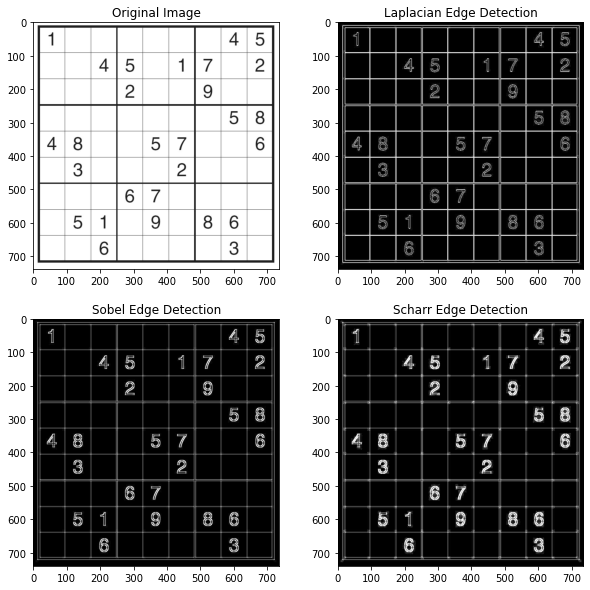

In [10]:
plt.figure(figsize=(10, 10))

plt.subplot(221)
plt.imshow(img, cmap='gray')
plt.title('Original Image')


# 라플라시안 필터 적용
laplacian = cv2.Laplacian(img, cv2.CV_64F)

# 결과 이미지의 절대값을 취하고, 8비트 이미지로 변환
abs_laplacian = cv2.convertScaleAbs(laplacian)

# 결과 표시
plt.subplot(222)
plt.imshow(abs_laplacian, cmap='gray')
plt.title('Laplacian Edge Detection')

# 소벨 필터 적용 - x축 방향
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)

# 소벨 필터 적용 - y축 방향
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

# 결과 이미지의 절대값을 취하고, 8비트 이미지로 변환
abs_sobelx = cv2.convertScaleAbs(sobelx)
abs_sobely = cv2.convertScaleAbs(sobely)

# 결과 이미지를 조합하여 완전한 에지 이미지 생성
sobel_combined = cv2.addWeighted(abs_sobelx, 0.5, abs_sobely, 0.5, 0)

# 결과 표시
plt.subplot(223)
plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel Edge Detection')

# 슈마르 필터 적용 - x축 방향
scharrx = cv2.Scharr(img, cv2.CV_64F, 1, 0)

# 슈마르 필터 적용 - y축 방향
scharry = cv2.Scharr(img, cv2.CV_64F, 0, 1)

# 결과 이미지의 절대값을 취하고, 8비트 이미지로 변환
abs_scharrx = cv2.convertScaleAbs(scharrx)
abs_scharry = cv2.convertScaleAbs(scharry)

# 결과 이미지를 조합하여 완전한 에지 이미지 생성
scharr_combined = cv2.addWeighted(abs_scharrx, 0.5, abs_scharry, 0.5, 0)

# 결과 표시
plt.subplot(224)
plt.imshow(scharr_combined, cmap='gray')
plt.title('Scharr Edge Detection')
plt.show()

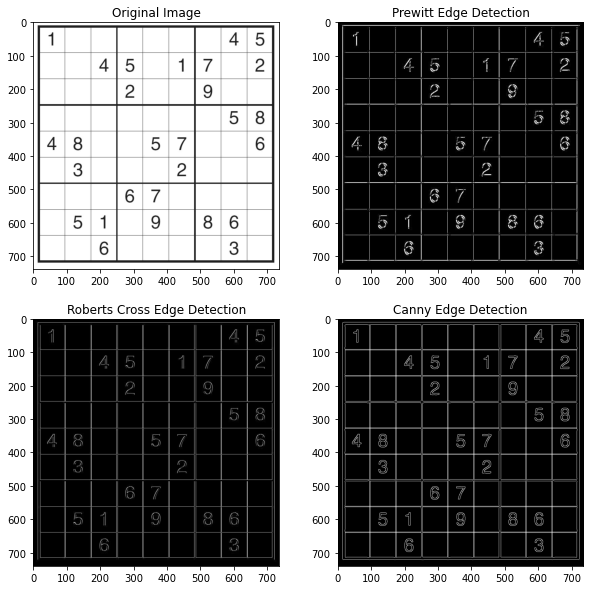

In [17]:
plt.figure(figsize=(10, 10))

plt.subplot(221)
plt.imshow(img, cmap='gray')
plt.title('Original Image')


# 프리윗 커널 정의
prewittx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
prewitty = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

# 필터 적용
img_prewittx = cv2.filter2D(img, -1, prewittx)
img_prewitty = cv2.filter2D(img, -1, prewitty)

# 결과 이미지 조합
img_prewitt = img_prewittx + img_prewitty

# 결과 표시
plt.subplot(222)
plt.imshow(img_prewitt, cmap='gray')
plt.title('Prewitt Edge Detection')

# 로버츠 크로스 커널 정의
robertsx = np.array([[1, 0], [0, -1]])
robertsy = np.array([[0, 1], [-1, 0]])

# 필터 적용
img_robertsx = cv2.filter2D(img, -1, robertsx)
img_robertsy = cv2.filter2D(img, -1, robertsy)

# 결과 이미지 조합
img_roberts = img_robertsx + img_robertsy

# 결과 표시
plt.subplot(223)
plt.imshow(img_roberts, cmap='gray')
plt.title('Roberts Cross Edge Detection')




edges = cv2.Canny(img, 100, 200)

# 결과 표시
plt.subplot(224)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')

plt.show()